<center>
<h1 style="color: #CC5500;">Support Vector Machines Project</h1>
<h2 style="color: #CC5500;">Part 2: Imbalanced Dataset</h2>
<h3>Machine Learning - Fundamentals and Algorithms</h3>
<h3>MSc Computer Science - Machine Learning and Data Mining</h3>
<h3>Université Jean Monnet</h3>

<h2 style="color: #CC5500;">Team Members</h2>
<ul style="list-style-type: none; padding: 0;">
	<li>Eduard</li>
	<li>Chelsy Mena</li>
	<li>Serhii Vakulenko</li>
</ul>
</center>

<h1> <span style="color: #CC5500;">1  |  </span> Data Description </h1>

The dataset chosen for study is the **Thyroid Disease** dataset, created by the Garavan Institute in Australia.

It is stored in `.data` files that contain in total 7200 entries with no missing values, nearly evenly split into 3772 training instances and 3428 testing instances. 

The dataset consists of 21 features, not named and most of them containing binary values; and it has three classes, represented in an inbalanced manner. The majority class is labeled `3`, while `1` and `2` will be our positive class.

We provide an overview of the dataset in the following cells.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from collections import Counter

In [12]:
df1 = pd.read_csv('ann-train.data', sep=' ', header=None)
df2 = pd.read_csv('ann-test.data', sep=' ', header=None)
df = pd.concat([df1, df2], ignore_index=True)
df = df.drop(df.columns[-2:], axis=1)
print("Read table with", df.shape[0], "rows and", df.shape[1], "columns")

Read table with 7200 rows and 22 columns


In [13]:
# Add generic column names (since the dataset has no headers)
num_attributes = 21
num_classes = 3 #Not actually used, just for documentation purposes.
column_names = [f'attr_{i}' for i in range(num_attributes)] + ['class']
df.columns = column_names

In [14]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,attr_0,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,...,attr_12,attr_13,attr_14,attr_15,attr_16,attr_17,attr_18,attr_19,attr_20,class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [15]:
print("Dataset information:\n")
df.info()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attr_0   7200 non-null   float64
 1   attr_1   7200 non-null   int64  
 2   attr_2   7200 non-null   int64  
 3   attr_3   7200 non-null   int64  
 4   attr_4   7200 non-null   int64  
 5   attr_5   7200 non-null   int64  
 6   attr_6   7200 non-null   int64  
 7   attr_7   7200 non-null   int64  
 8   attr_8   7200 non-null   int64  
 9   attr_9   7200 non-null   int64  
 10  attr_10  7200 non-null   int64  
 11  attr_11  7200 non-null   int64  
 12  attr_12  7200 non-null   int64  
 13  attr_13  7200 non-null   int64  
 14  attr_14  7200 non-null   int64  
 15  attr_15  7200 non-null   int64  
 16  attr_16  7200 non-null   float64
 17  attr_17  7200 non-null   float64
 18  attr_18  7200 non-null   float64
 19  attr_19  7200 non-null   float64
 20  attr_20  7200 non-null   float

In [16]:
print("Descriptive statistics: \n")
print(df.describe())

Descriptive statistics: 

            attr_0       attr_1       attr_2       attr_3       attr_4  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000   
mean      0.520518     0.304306     0.130556     0.015417     0.012778   
std       0.189269     0.460145     0.336937     0.123212     0.112322   
min       0.010000     0.000000     0.000000     0.000000     0.000000   
25%       0.370000     0.000000     0.000000     0.000000     0.000000   
50%       0.550000     0.000000     0.000000     0.000000     0.000000   
75%       0.670000     1.000000     0.000000     0.000000     0.000000   
max       0.970000     1.000000     1.000000     1.000000     1.000000   

            attr_5       attr_6       attr_7       attr_8       attr_9  ...  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000  ...   
mean      0.038333     0.010833     0.014028     0.016806     0.065556  ...   
std       0.192013     0.103525     0.117613     0.128551     0.247521

In [17]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

attr_0     0
attr_1     0
attr_2     0
attr_3     0
attr_4     0
attr_5     0
attr_6     0
attr_7     0
attr_8     0
attr_9     0
attr_10    0
attr_11    0
attr_12    0
attr_13    0
attr_14    0
attr_15    0
attr_16    0
attr_17    0
attr_18    0
attr_19    0
attr_20    0
class      0
dtype: int64


In [18]:
print("Class distribution:\n")
print(df['class'].value_counts())

Class distribution:

class
3    6666
2     368
1     166
Name: count, dtype: int64


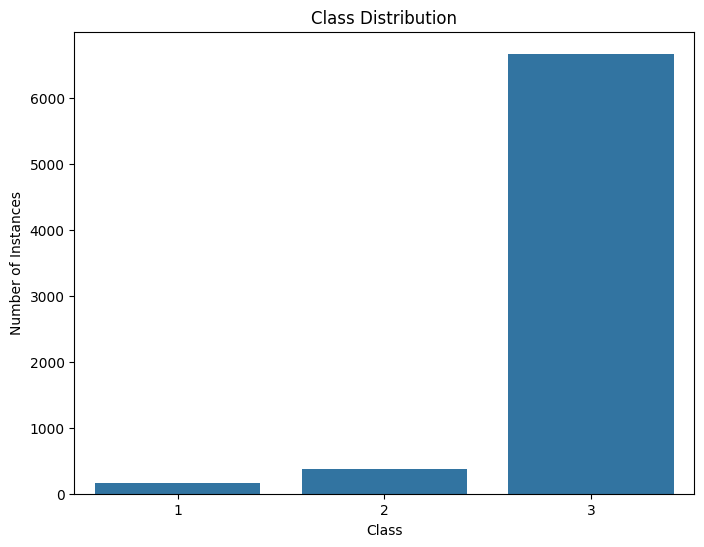

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

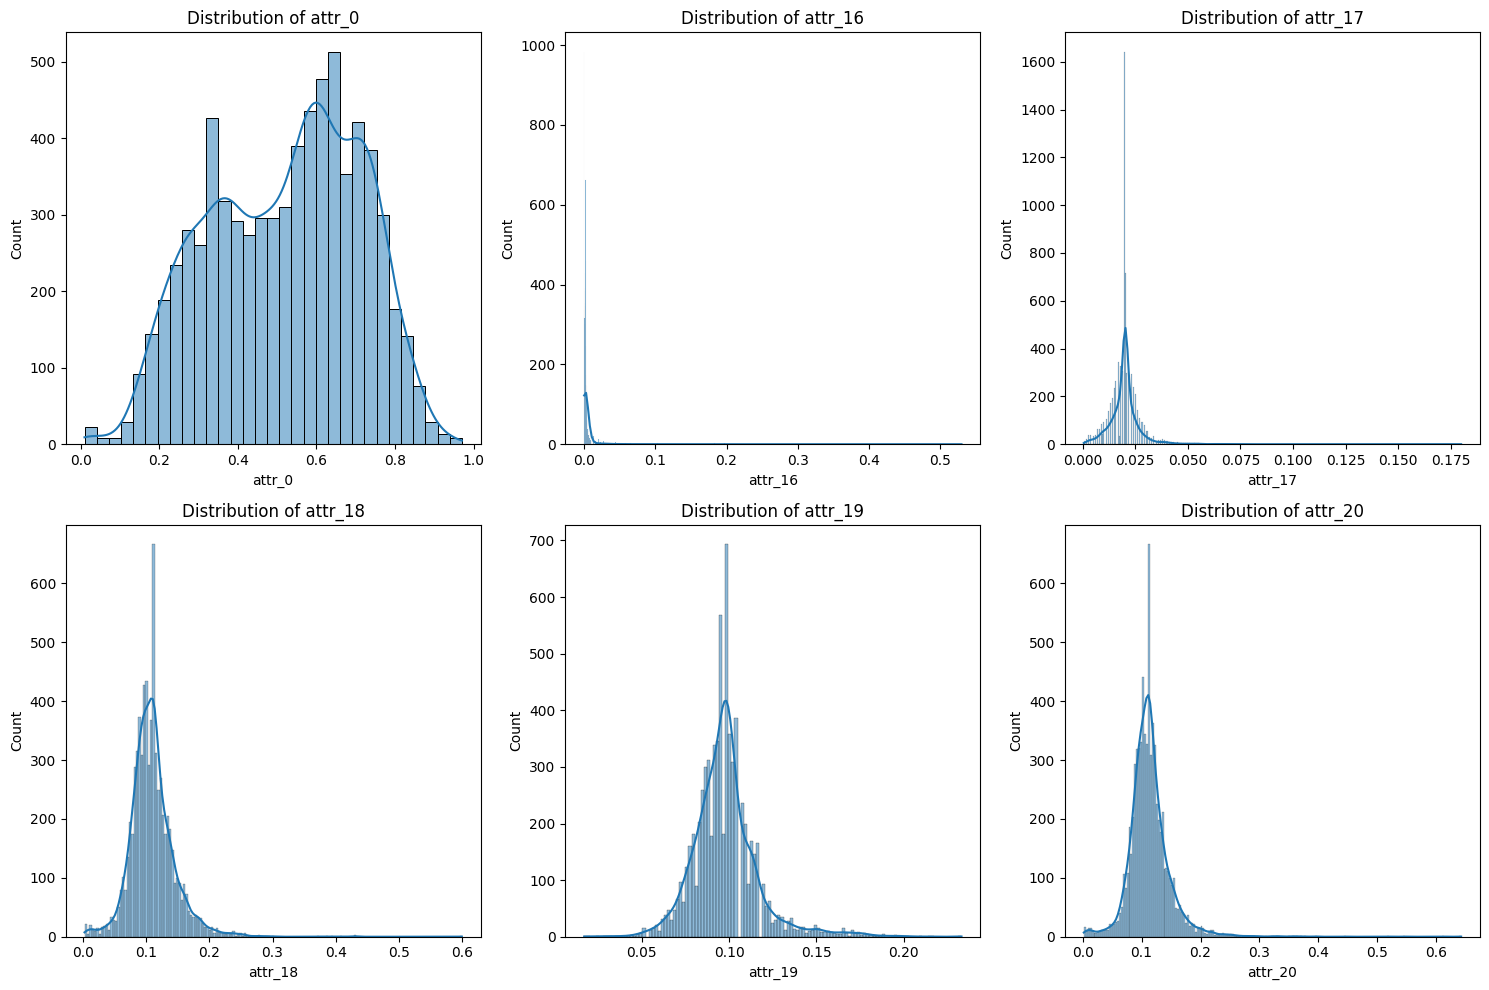

In [24]:
# Histograms for continuous features
X = df.drop('class', axis=1)
continuous_cols = [col for col in X.columns if X[col].dtype == 'float64']  # Identify continuous
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

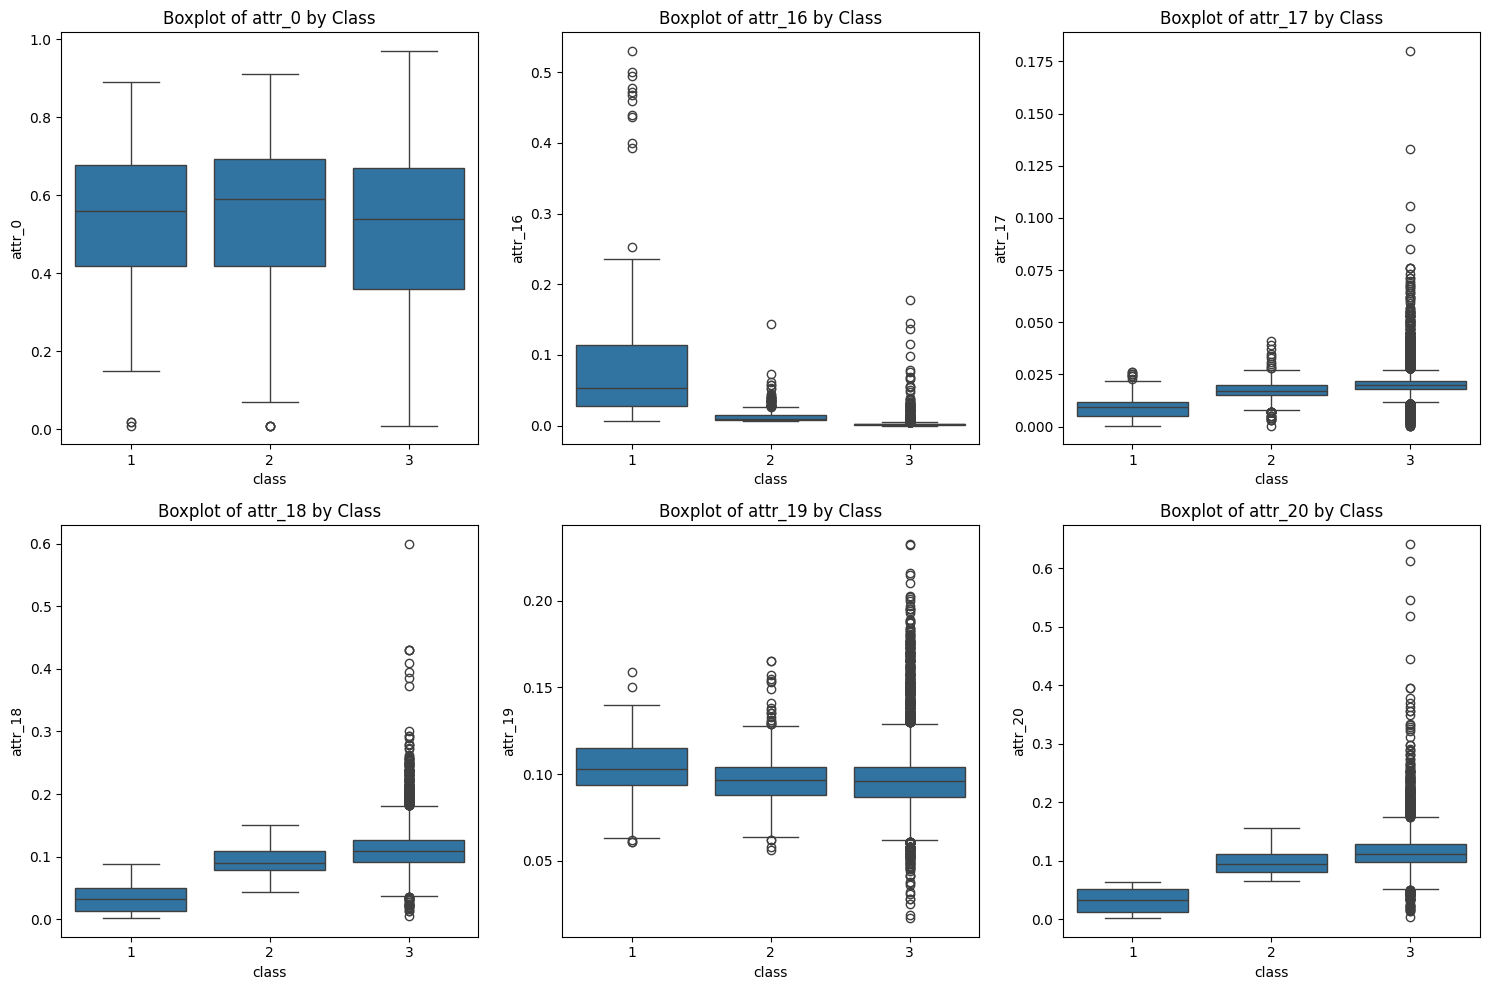

In [25]:
# Box plots for continuous features, separated by class
y = df['class']
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=y, y=X[col])
    plt.title(f'Boxplot of {col} by Class')
plt.tight_layout()
plt.show()

As we can see, even though there are numerous outliers in the variables it seems most of our features behave in a way that can be approximated as normal. It's interesting that the `attr_0` appears two have two modes. The features with the most marked changes in behavior between our majority class and the minority ones seems to be the `attr_16`, but it is still quite close to the class `2` as it is in the rest of the continuous features.

In the following plot we can see that out features are mostly independent among each other, the exception being `attr_18` with `attr_20`.

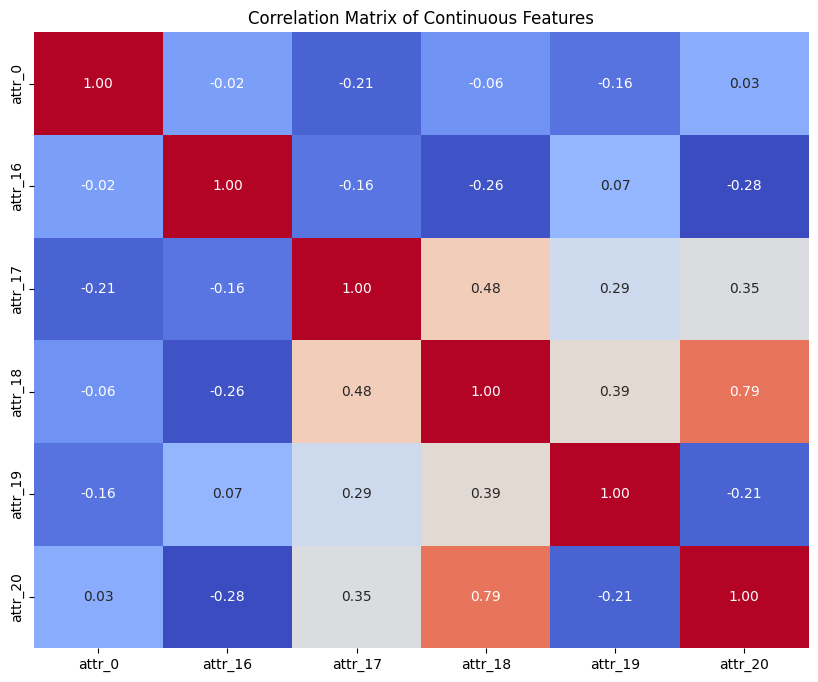

In [26]:
# Correlation matrix (for continuous features)
if continuous_cols:
    plt.figure(figsize=(10, 8))
    correlation_matrix = X[continuous_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
    plt.title('Correlation Matrix of Continuous Features')
    plt.show()
else:
     print("No continuous columns found for correlation matrix.")

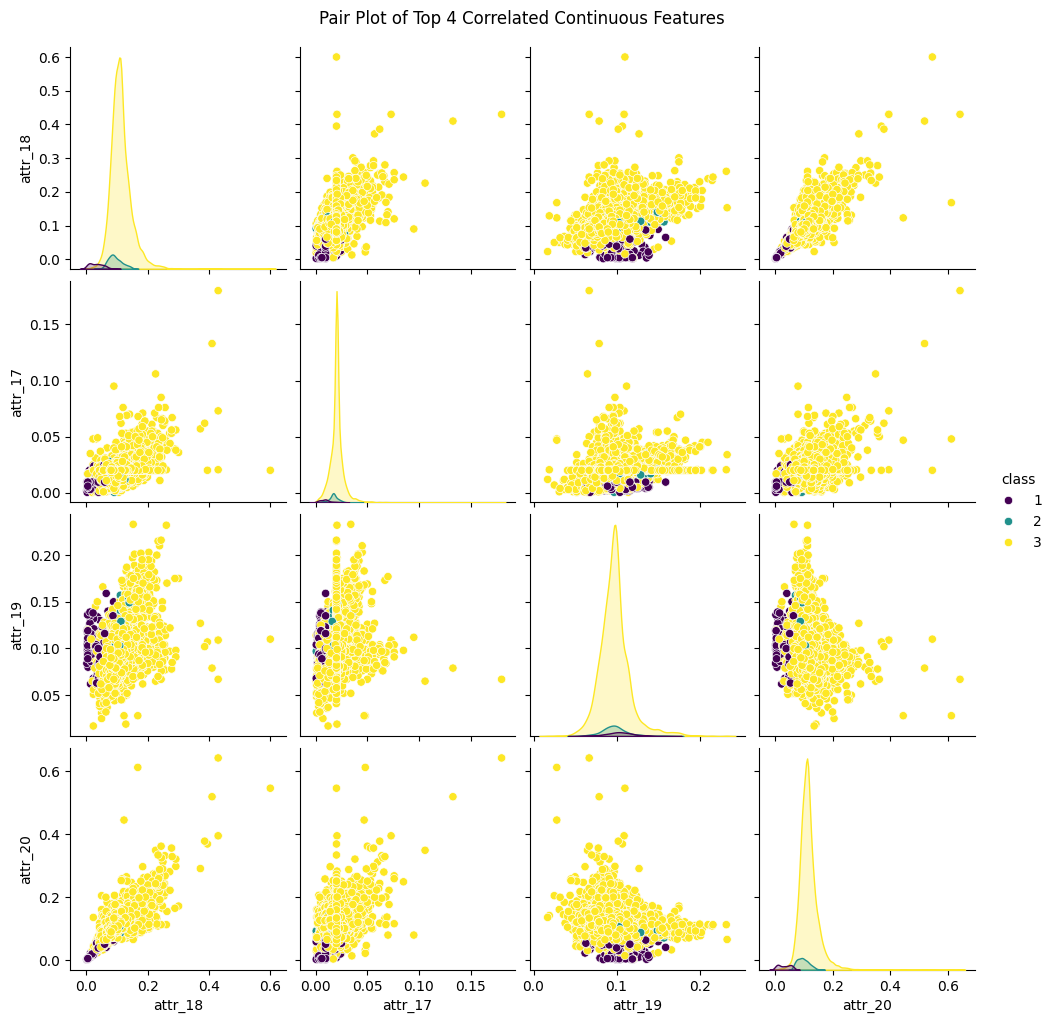

In [ ]:
pairplot_df = X[continuous_cols].copy()
pairplot_df['class'] = y

if len(continuous_cols) > 0: #Check for columns
    if len(continuous_cols) <= 5:  # If 5 or fewer continuous, plot all
        sns.pairplot(pairplot_df, hue='class', palette='viridis')  # Choose a color palette
        plt.suptitle("Pair Plot of Continuous Features (All)", y=1.02)  # Add a title
        plt.show()
    else:
        num_to_plot = 5
        correlation_matrix = X[continuous_cols].corr()
        correlations_with_target = abs(correlation_matrix).unstack().sort_values(ascending=False)
        correlations_with_target = correlations_with_target[correlations_with_target.index.get_level_values(0) != correlations_with_target.index.get_level_values(1)]

        top_n_correlated = correlations_with_target.head(num_to_plot)
        top_correlated_cols = list(set([item for sublist in top_n_correlated.index for item in sublist]))

        if 'class' in top_correlated_cols:
             top_correlated_cols.remove('class')

        sns.pairplot(pairplot_df[top_correlated_cols + ['class']], hue='class', palette='viridis')
        plt.suptitle(f"Pair Plot of Top {len(top_correlated_cols)} Correlated Continuous Features", y=1.02)
        plt.show()
else:
   print("There are no continuous features to do the pairplot")

There seem to be a few feature pairs where classifying the instances would be fairly simple, `attr_18` and `attr_17` vs `attr_20` in particular seem to have an agglomeration of the minority class in a corner for example. 

In [23]:
from scipy.stats import f_oneway, ttest_ind

anova_df = pd.DataFrame(columns=['Feature', 'F-statistic', 'P-value', 'Significant Difference'])

# ANOVA
print("\n--- ANOVA (Continuous Features) ---")
if len(np.unique(y)) > 2:  # Check if there are more than 2 classes
    for col in continuous_cols:
        groups = []
        for class_label in np.unique(y):
            groups.append(X[col][y == class_label])  # Filter by class

        # Perform ANOVA
        if len(groups)>1 and all(len(group) > 0 for group in groups): #Avoids errors caused by empty groups
            f_statistic, p_value = f_oneway(*groups)  # *groups unpacks the list
            # print(f"Feature: {col}")
            # print(f"  F-statistic: {f_statistic:.4f}")
            # print(f"  P-value: {p_value:.4f}")

            # Interpretation
            # if p_value < 0.05:
            #     print("  Significant difference between class means.")
            # else:
            #     print("  No significant difference between class means.")

            # Store results in a DataFrame
            anova_df.loc[len(anova_df)] = [col, f_statistic, p_value, p_value < 0.05]
        else:
            print(f'{col} cannot perform ANOVA because there are empty groups')
else:
    print("ANOVA not applicable (only 2 or fewer classes).")


--- ANOVA (Continuous Features) ---


In [24]:
anova_df

,Feature,F-statistic,P-value,Significant Difference
0,attr_0,6.609867,1.355203e-03,True
1,attr_16,2259.412627,0.000000e+00,True
2,attr_17,199.807904,3.532044e-85,True
3,attr_18,490.407782,2.159318e-200,True
4,attr_19,6.692577,1.247815e-03,True
5,attr_20,548.514141,1.914202e-222,True


In [26]:
print("\n--- t-tests (Continuous Features) ---")
unique_classes = np.unique(y)
t_test_df = pd.DataFrame(columns=['Feature', 'Class 1', 'Class 2', 'T-statistic', 'P-value', 'Significant Difference'])

if len(unique_classes) == 2:
    # Only one t-test needed
        class1_data = X[y == unique_classes[0]]
        class2_data = X[y == unique_classes[1]]

        for col in continuous_cols:
            if len(class1_data[col])>0 and len(class2_data[col])>0: #Avoid errors with empty arrays
                t_statistic, p_value = ttest_ind(class1_data[col], class2_data[col])
                # print(f"Feature: {col}")
                # print(f"  T-statistic: {t_statistic:.4f}")
                # print(f"  P-value: {p_value:.4f}")

                # if p_value < 0.05:
                #   print("  Significant difference between class means.")
                # else:
                #   print("  No significant difference between class means.")

                t_test_df.loc[len(t_test_df)] = [col, unique_classes[0], unique_classes[1], t_statistic, p_value, p_value < 0.05]
            else:
               print(f'{col} cannot perform t-test (empty arrays)')
elif len(unique_classes) >2:
    # Loop for combinations
        for i in range(len(unique_classes)):
            for j in range(i + 1, len(unique_classes)):
                class1 = unique_classes[i]
                class2 = unique_classes[j]
                class1_data = X[y == class1]
                class2_data = X[y == class2]

                for col in continuous_cols:
                  if len(class1_data[col])>0 and len(class2_data[col])>0: #Avoids errors caused by empty arrays
                    t_statistic, p_value = ttest_ind(class1_data[col], class2_data[col])
                    # print(f"Feature: {col}, Class {class1} vs Class {class2}")
                    # print(f"  T-statistic: {t_statistic:.4f}")
                    # print(f"  P-value: {p_value:.4f}")

                    # if p_value < 0.05:
                    #     print("  Significant difference between class means.")
                    # else:
                    #     print("  No significant difference between class means.")

                    t_test_df.loc[len(t_test_df)] = [col, class1, class2, t_statistic, p_value, p_value < 0.05]
                  else:
                    print(f'{col} cannot perform t-test (empty arrays)')


--- t-tests (Continuous Features) ---


In [28]:
print("\n--- t-tests (Binary Features) ---")
if len(unique_classes) == 2:
    #Only one t-test needed.
    class1_data = X[y == unique_classes[0]]
    class2_data = X[y == unique_classes[1]]

    for col in binary_cols:
        if len(class1_data[col])>0 and len(class2_data[col])>0:
            t_statistic, p_value = ttest_ind(class1_data[col].astype(int), class2_data[col].astype(int))  # Convert to int
            # print(f"Feature: {col}")
            # print(f"  T-statistic: {t_statistic:.4f}")
            # print(f"  P-value: {p_value:.4f}")
            # if p_value < 0.05:
            #     print("  Significant difference between class means.")
            # else:
            #     print("  No significant difference between class means.")

            t_test_df.loc[len(t_test_df)] = [col, unique_classes[0], unique_classes[1], t_statistic, p_value, p_value < 0.05]
        else:
          print(f'{col} cannot perform t-test (empty arrays)')

elif len(unique_classes) >2:
    for i in range(len(unique_classes)):
      for j in range(i + 1, len(unique_classes)):
        class1 = unique_classes[i]
        class2 = unique_classes[j]
        class1_data = X[y == class1]
        class2_data = X[y == class2]
        for col in binary_cols:
            if len(class1_data[col])>0 and len(class2_data[col])>0:
                t_statistic, p_value = ttest_ind(class1_data[col].astype(int), class2_data[col].astype(int)) #Convert to integers
                # print(f"Feature: {col}, Class {class1} vs Class {class2}")
                # print(f"  T-statistic: {t_statistic:.4f}")
                # print(f"  P-value: {p_value:.4f}")
                # if p_value < 0.05:
                #   print("  Significant difference between class means.")
                # else:
                #   print("  No significant difference between class means.")

                t_test_df.loc[len(t_test_df)] = [col, class1, class2, t_statistic, p_value, p_value < 0.05]
            else:
                print(f'{col} cannot perform t-test (empty arrays)')


--- t-tests (Binary Features) ---


In [29]:
t_test_df

,Feature,Class 1,Class 2,T-statistic,P-value,Significant Difference
0,attr_0,1,2,-1.007657,3.140770e-01,False
1,attr_16,1,2,13.844144,1.911176e-37,True
2,attr_17,1,2,-14.542542,1.392374e-40,True
3,attr_18,1,2,-30.656659,1.196816e-119,True
4,attr_19,1,2,3.360138,8.349378e-04,True
...,...,...,...,...,...,...
58,attr_11,2,3,0.587106,5.571514e-01,False
59,attr_12,2,3,-1.812533,6.994645e-02,False
60,attr_13,2,3,-0.480496,6.308897e-01,False
61,attr_14,2,3,-0.234943,8.142600e-01,False


In [30]:
#Chi-squared tests for binary features:
from scipy.stats import chi2_contingency

chi2_df = pd.DataFrame(columns=['Feature', 'Chi2 Statistic', 'P-value', 'Significant Association'])

print("\n--- Chi-squared Tests (Binary Features) ---")

for col in binary_cols:
    contingency_table = pd.crosstab(X[col], y)
    if contingency_table.shape == (2, len(unique_classes)):  # Check for valid dimensions
      chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

      # print(f"Feature: {col}")
      # print(f"  Chi2 Statistic: {chi2_stat:.4f}")
      # print(f"  P-value: {p_val:.4f}")
      # print(f"  Degrees of Freedom: {dof}")
      # # print(f"  Expected Frequencies:\n{expected}") # Optional

      # if p_val < 0.05:
      #   print("  Significant association between feature and class.")
      # else:
      #   print("  No significant association between feature and class.")

      chi2_df.loc[len(chi2_df)] = [col, chi2_stat, p_val, p_val < 0.05]
    else:
      print(f"Skipping Chi-squared for {col} due to invalid contingency table dimensions.")


--- Chi-squared Tests (Binary Features) ---


In [31]:
chi2_df

,Feature,Chi2 Statistic,P-value,Significant Association
0,attr_1,21.682384,1.957628e-05,True
1,attr_2,60.090068,8.945560e-14,True
2,attr_3,2.783672,2.486184e-01,False
3,attr_4,1.319214,5.170545e-01,False
4,attr_5,5.013920,8.151567e-02,False
5,attr_6,6.316857,4.249246e-02,True
6,attr_7,6.584567,3.716888e-02,True
7,attr_8,3.846098,1.461607e-01,False
8,attr_9,52.879708,3.290920e-12,True
9,attr_10,1.219482,5.434917e-01,False


# References

- R. Quinlan. "Thyroid Disease," UCI Machine Learning Repository, 1986. [Online]. Available: https://doi.org/10.24432/C5D010.